<a href="https://colab.research.google.com/github/olexandr7/erm_workshop/blob/main/ERM_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Workshop 1** is focused on trying out textual manipulation

Let's now pick a museum collection from MuIS and try several operations:
* loading all items from collection
* making a word cloud out of item titles
* making a word cloud for a specific item - shaped like an item
* exporting collection to Excel

**Block 1**: installing relevant libraries for textual manipulation

In [2]:
#RDF scripts taken from rdflib tutorial:
#https://rdflib.readthedocs.io/en/stable/gettingstarted.html#a-more-extensive-example
#-------------------------------
#RDF manipulations
%pip install rdflib
#-------------------------------
#plotting
import matplotlib.pyplot as plt
#manipulations with dataframes
import pandas as pd
#URL requests loading
import urllib.request
#multidimensional arrays
import numpy as np
#image manipulation
import cv2
#---------------------------
#workaround to show opencv images in Colab
from google.colab.patches import cv2_imshow
#RDF manipulations - Graphics
from rdflib import Graph
#visualizing word cloud
from wordcloud import WordCloud
#downloading files from Colab
from google.colab import files

**Block 2**: Displaying details of MuIS item in RDF
<br>  <font color='orange'>CHANGE:</font> Try changing URL to any other item from MUiS - there's a *püsiviide/permalink* for each item in UI
https://www.muis.ee/museaalview/1887998 -> https://opendata.muis.ee/object/1887998

In [14]:
# Create a Graph
g = Graph()
#this item could be viewed from MuIS UI via: https://www.muis.ee/museaalview/1887998
# Parse in an RDF file hosted on the Internet
g.parse("https://opendata.muis.ee/object/3761070")         #<---  URL could be changed to any item from MuIS
#displaying RDF contents - details about specific item
for s, p, o in g:
    print(s, p, o)
#Print out the entire Graph in the RDF Turtle format (added as just another example)
#print(g.serialize(format='turtle'))

N97c19c7a5f4b4ac19e8351f542c492a7 http://www.w3.org/2002/07/owl#versionInfo version 1.0
Nf7f2beb047bb46018dc8aa3cb07d5cab http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.cidoc-crm.org/cidoc-crm/E57_Material
N8d71fe3b3b2c45eeb27800a88570fe54 http://www.cidoc-crm.org/cidoc-crm/P2_has_type http://opendata.muis.ee/thesaurus/54/2652
http://opendata.muis.ee/object/3761070 http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.cidoc-crm.org/cidoc-crm/E18_Physical_Thing
Nf5640b0a38714ec98f00cb1e5197bb84 http://www.cidoc-crm.org/cidoc-crm/P2_has_type http://opendata.muis.ee/thesaurus/54/2652
http://opendata.muis.ee/object/3761070 http://purl.org/dc/terms/identifier TLM _ 31291:1 H 3764
http://opendata.muis.ee/object/3761070 http://www.cidoc-crm.org/cidoc-crm/P102_has_title N8d71fe3b3b2c45eeb27800a88570fe54
http://opendata.muis.ee/object/3761070 http://www.cidoc-crm.org/cidoc-crm/P52_has_current_owner http://opendata.muis.ee/person-group/93619
http://opendata.muis.ee/object/376107

🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛
<br>
**Dataset**: textile collection (Muuseumikogu: tekstiil) from Tallinna Linnamuuseum
<br>
http://www.muis.ee/rdf/collection/837
(change to bricks collection)
(why bricks - bricks load quicker)
(some examples here - where to get collection URL from exactly for people to test out later / in MuIS)


(seems like we also need to have limit on items of collection - so that we could load only like 50 first items)
(we could also try to have some other subsets, perhaps also on age/period of items)
(so yeah, let's have couple of filters on which items are loaded) - first 50 and also some historical periods
<br>
🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛🏛

**Block 3**: Loading all items from textile collection into a list
<br>  <font color='orange'>CHANGE:</font> Try changing URL to a different MuIS collection
(also show people how to change filters / add modifiers)
(let's also have filters in here)

In [4]:
g = Graph()
collectionitemslist = []

# Parse in an RDF file
g.parse("http://www.muis.ee/rdf/collection/837")    #<---CHANGE: could be changed to any collection from MuIS

#Textile collection - UI:
#https://www.muis.ee/museaalview:cataloguemuuseumkogu/93619-837?t:ac=1887998
#--------------------------------------------------------
#http://www.muis.ee/rdf/collection/837 #Textile collection
#http://www.muis.ee/rdf/collection/849 #Brick collection

#loop through triples
for s, p, o in g:
    if "P46_is_composed_of" in p: collectionitemslist.append(o)

#counting items within the list
count = 0
for items in collectionitemslist:
        count = count + 1
print("Total count of items in collection:", count)

Total count of items in collection: 4076


**Block 4**: Loading details for each of items into a dataframe
<br>
At the moment we're specifically interested in 2 fields:
*  item's URL
*  item's title

Since the collection could be quite extensive, we're going to load only 20 first items

<font color='orange'>CHANGE: </font> Try changing the column titles within datframe

In [5]:
#Generating dataset for wordcloud

#filtering out values from valid URLs, adding them into two lists
collectionitemslist_url = []
collectionitemslist_title = []

iter = 0

for i in collectionitemslist:
    g = Graph()
    try:
      g.parse(i)
      for s, p, o in g:
            if "http://opendata.muis.ee/object/" in s and "www.w3.org/2000/01/rdf-schema#label" in p:  print(iter, ':', o),  collectionitemslist_url.append(i), collectionitemslist_title.append(o)
      iter += 1
      if iter == 50:           #<---CHANGE: number of items to load could be adjusted
        break
    except Exception:
        pass
#making dataframe out of 2 lists
df = pd.DataFrame(list(zip(collectionitemslist_url, collectionitemslist_title)))
df = df.rename(columns={0: 'URL', 1: 'Title'})

#displaying dataframe
df

0 : Beebi jakk 
1 : Ristpistetikandi proov
2 : Naiste sõrmkindad
3 : Padrunitasku, Mustpeade vennaskond
4 : Linik
5 : Pesunööp
6 : Lõkme. Tallinna Aleksandri Gümnaasiumi kolleegiumiassessori vormikuuel
7 : Naisteking "Välk"
8 : Naiste taskurätik
9 : Naiste pesupüksid
10 : Meeste lips
11 : Heegeldamisproovid
12 : Kiiver, Mustpeade Vennaskond
13 : Laustekstiili näidis / Põrandakatte materjal
14 : Meeste saapad / Poolsaapad. "Kommunaar"
15 : Beebimüts
16 : Päevateki äärepits / Heegelpits
17 : Tütarlapse müts
18 : Meeste pikad pesupüksid
19 : Naistekingad / Puukingad
20 : Suveniirrätik. "Tallinn 1635, Vaade idast" Adam Olearius
21 : Põll
22 : Kaunistuspaelad
23 : Sukkpüksid
24 : Linake
25 : Toasussi pealsed / Muhu pätid (poolik töö)
26 : Pael pakendis
27 : Kootud peasall
28 : Pits, niplispits
29 : Naiste alusseelik / Aluskuub 
30 : Vimpel. Tallinna Buldog-90 Karate
31 : Naiste sõrmkindad
32 : Kätised
33 : Pael. A.S. Rauaniit
34 : Vormimüts. Tallinna Kaarli Gümnaasium
35 : Trompeti bandelje

,URL,Title
0,http://opendata.muis.ee/object/1203090,Beebi jakk
1,http://opendata.muis.ee/object/1879865,Ristpistetikandi proov
2,http://opendata.muis.ee/object/1895120,Naiste sõrmkindad
3,http://opendata.muis.ee/object/1201740,"Padrunitasku, Mustpeade vennaskond"
4,http://opendata.muis.ee/object/1202243,Linik
5,http://opendata.muis.ee/object/1928414,Pesunööp
6,http://opendata.muis.ee/object/1911186,Lõkme. Tallinna Aleksandri Gümnaasiumi kolleeg...
7,http://opendata.muis.ee/object/4020294,"Naisteking ""Välk"""
8,http://opendata.muis.ee/object/1196020,Naiste taskurätik
9,http://opendata.muis.ee/object/1892286,Naiste pesupüksid


🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖
<br>
Let's try using Colab functionality (auto-suggestions or built-in AI) and *generate frequency chart* automatically
<br>🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖🤖

**Block 4**: Making word cloud out of loaded collection data (item titles)
<br>  <font color='orange'>Action point: </font> Try changing how the word cloud is displayed (e.g. axis mode)
should find some way to modify the cloud visually

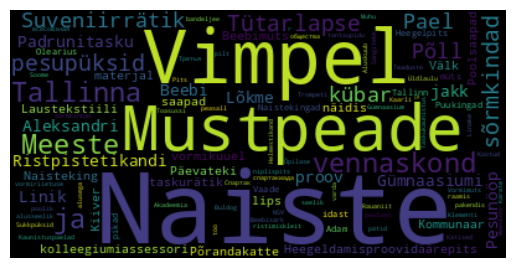

In [6]:
#Creating wordcloud based on example from:
#https://github.com/amueller/word_cloud/blob/main/examples/simple.py

#additional filtering could be applied if needed --should remove
#df = df[df['Label'].str.contains("Kleit")]
#creating a single string with all values from title column
df_joined = ' '.join(df['Title'].to_list())

#creating wordcloud
wordcloud = WordCloud(max_font_size=80, background_color="black", contour_color='steelblue') #<---CHANGE: background color could be modified
#generating word cloud from data (single string with all values)
wordcloud.generate(df_joined)


plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#displaying word cloud
plt.show()

**Block 5**: Making word cloud out of one item in the shape of the same item


<br>  <font color='orange'>CHANGE: </font> Try changing how the word cloud is displayed (e.g. axis mode)
should find some way to modify the cloud visually

In [7]:
#loading data for specific item
g = Graph()
tinycollectionitemslist_label = []

#parsing sled blanket: https://www.muis.ee/museaalview/1537361
g.parse("https://opendata.muis.ee/object/1537361")
for s, p, o in g:
  if "http://opendata.muis.ee/object/" not in s and "rdf-schema#label" in p and "tervik" not in o: tinycollectionitemslist_label.append(o)

#making dataframe out of a list
df_tiny = pd.DataFrame(list(zip(tinycollectionitemslist_label)))
df_tiny = df_tiny.rename(columns={0: 'Label'})
#creating a single string with all values from label  column
df_joined_tiny = ' '.join(df_tiny['Label'].to_list())
df_joined_tiny

'Tikitud saanitekk, hallist kodukootud villasest riidest. Vaiba ühte äärde tikitud villaste lõngadega mitmevärviline tikand, mis koosneb punakais toonides õitest ja ruudukestest kollakais-rohekais toonides lehtedest ja joontest. Servad masinpalistusega.'

**Block 6**: Manupulating masking image


<br>  <font color='orange'>CHANGE: </font> Try changing how the word cloud is displayed (e.g. axis mode)
should find some way to modify the cloud visually

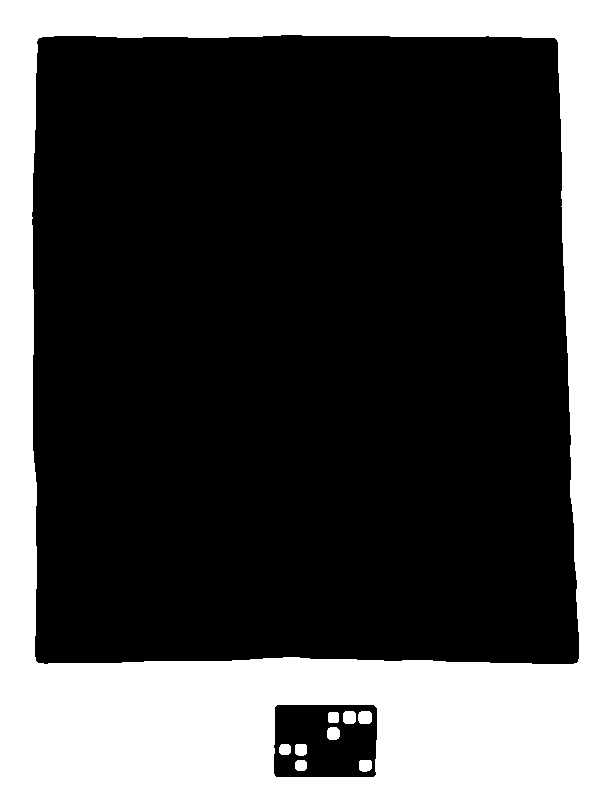

In [8]:
#https://www.muis.ee/museaalview/402105

# read the mask image
url = "https://www.muis.ee/digitaalhoidla/api/meedia/pisipilt?id=650d7c6d-a6e5-47c6-8c8a-3531bdd5f54c"  #<---  URL could be changed to any image from MuIS
url_response = urllib.request.urlopen(url)
mask_image = cv2.imdecode(np.array(bytearray(url_response.read()), dtype=np.uint8), -1)

#converting image to greyscale
mask_image_grey = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)


#adaptive thresholding
mask_image_grey = cv2.medianBlur(mask_image_grey,5)
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(mask_image_grey,(5,5),0)
ret3,mask_image_binarized = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow(mask_image_binarized)

**Block 7**: Manupulating masking image


<br>  <font color='orange'>CHANGE: </font> Try changing how the word cloud is displayed (e.g. axis mode)
should find some way to modify the cloud visually

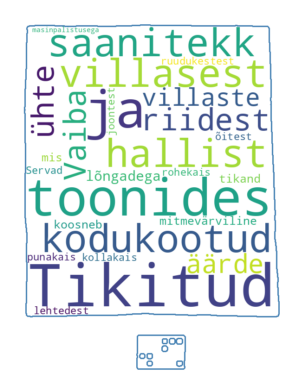

In [9]:
#example taken from:
#https://github.com/amueller/word_cloud/blob/main/examples/masked.py
#https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

wc = WordCloud(background_color="white", max_words=1000, max_font_size=400, mask=mask_image_binarized,
              contour_width=3, contour_color='steelblue')

# generate word cloud
wc.generate(df_joined_tiny)

# show
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓
<br>Let's now look into exporting MuIS content into Excel file
<BR>
📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓📓

**Block 8**: Loading item details into a dataframe - choosing column that we would like to see in output (excel) file
<br>  <font color='orange'>Action point: </font> Try changing how the word cloud is displayed (e.g. axis mode)

we should explain why those specific columns are exported
people could work on it later or something

In [ ]:
#filtering out values from valid URLs, adding them into multiple lists
collectionitemslist_url1 = []
collectionitemslist_url2 = []
collectionitemslist_url3 = []
collectionitemslist_url4 = []
collectionitemslist_url5 = []
collectionitemslist_url6 = []
#----------------------------
collectionitemslist_title = []
collectionitemslist_label = []
collectionitemslist_availabiletime = []
collectionitemslist_identifier = []
collectionitemslist_publisher = []
collectionitemslist_collection = []
iter = 0

for i in collectionitemslist:
    g = Graph()
    try:
        print(i)
        g.parse(i)
        for s, p, o in g:
            if "http://opendata.muis.ee/object/" in s and "www.w3.org/2000/01/rdf-schema#label" in p:  print(iter, ':', 'title |', o), collectionitemslist_url1.append(i), collectionitemslist_title.append(o)
            if "purl.org/dc/terms/available" in p:  print(iter, ':', 'availabile_time |', o), collectionitemslist_url2.append(i), collectionitemslist_availabiletime.append(o)
            if "purl.org/dc/terms/identifier" in p:  print(iter, ':', 'identifier |', o), collectionitemslist_url3.append(i), collectionitemslist_identifier.append(o)
            if "purl.org/dc/elements/1.1/publisher" in p:  print(iter, ':', 'publisher |', o), collectionitemslist_url4.append(i), collectionitemslist_publisher.append(o)
            if "http://opendata.muis.ee/object/" in s and "cidoc-crm/P46i_forms_part_of" in p and "/collection/" in o:  print(iter, ':', 'collection |', o), collectionitemslist_url5.append(i), collectionitemslist_collection.append(o)
            if "http://opendata.muis.ee/object/" not in s and "rdf-schema#label" in p and "tervik" not in o:  print(iter, ':', 'label |', o), collectionitemslist_url6.append(i), collectionitemslist_label.append(o)
        print('----------------------------------------')
        iter += 1
        if iter == 20:           #<---CHANGE: number of items to load could be adjusted
          break
    except:
        pass

In [39]:
#special logic for Labels - as one item could have multiple lables
df_labels = pd.DataFrame(list(zip(collectionitemslist_url6, collectionitemslist_label)))
df_labels = df_labels.rename(columns={0: 'URL',1: 'Label'})
#concatenating labels
df_labels = df_labels.groupby('URL')['Label'].apply(' '.join).reset_index()
#--------------------------------------------------------------------------
#creating dataframes for other columns
df_collection = pd.DataFrame(list(zip(collectionitemslist_url5, collectionitemslist_collection)))
df_publisher = pd.DataFrame(list(zip(collectionitemslist_url4, collectionitemslist_publisher)))
df_identifier = pd.DataFrame(list(zip(collectionitemslist_url3, collectionitemslist_identifier)))
df_availabletime = pd.DataFrame(list(zip(collectionitemslist_url2, collectionitemslist_availabiletime)))
df_title = pd.DataFrame(list(zip(collectionitemslist_url1, collectionitemslist_title)))
#renaming columns
df_collection = df_collection.rename(columns={0: 'URL',1: 'Collection'})
df_publisher = df_publisher.rename(columns={0: 'URL',1: 'Publisher'})
df_identifier = df_identifier.rename(columns={0: 'URL',1: 'Identifier'})
df_availabletime = df_availabletime.rename(columns={0: 'URL',1: 'Available_time'})
df_title = df_title.rename(columns={0: 'URL',1: 'Title'})
#finally merging all dataframes together on URL column
df_labels.set_index('URL',inplace=True)
df_collection.set_index('URL',inplace=True)
df_publisher.set_index('URL',inplace=True)
df_identifier.set_index('URL',inplace=True)
df_availabletime.set_index('URL',inplace=True)
df_title.set_index('URL',inplace=True)
df_all = pd.concat([df_identifier, df_title, df_availabletime, df_publisher, df_collection, df_labels],axis=1,sort=False).reset_index()
df_all

,URL,Identifier,Title,Available_time,Publisher,Collection,Label
0,http://opendata.muis.ee/object/1203090,TLM _ 27315 H 3270,Beebi jakk,13-09-2004,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,NaN
1,http://opendata.muis.ee/object/1879865,TLM _ 13141:10 H 1348,Ristpistetikandi proov,12-05-1971,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Tikitud ristpistes rohekashalli, musta, punast..."
2,http://opendata.muis.ee/object/1895120,TLM _ 16778/a-b H 1868,Naiste sõrmkindad,15-02-1979,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,Sõrmikud Kreemikast puuvillasest trikooriidest...
3,http://opendata.muis.ee/object/1201740,TLM _ 3591 H 109,"Padrunitasku, Mustpeade vennaskond",18-08-1945,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Padrunitasku, mustaks värvitud plekist, karbik..."
4,http://opendata.muis.ee/object/1202243,TLM _ 23918:5 H 2856,Linik,27-07-1991,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Heegeldatud pruunist puuvillasest niidist, ümm..."
5,http://opendata.muis.ee/object/1928414,TLM _ 18822:1 H 2139,Pesunööp,14-09-1982,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Pesunööp, ümmargune, üks pool valgest puuvilla..."
6,http://opendata.muis.ee/object/1911186,TLM _ 23287:1 H 2710,Lõkme. Tallinna Aleksandri Gümnaasiumi kolleeg...,21-06-1989,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,Õlak Lõkmed Tallinna Aleksandri Gümnaasiumi õp...
7,http://opendata.muis.ee/object/4020294,TLM _ 31653:1 H 3800,"Naisteking ""Välk""",11-12-2020,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Välk Naistekingad, mustast lakknahast, valmist..."
8,http://opendata.muis.ee/object/1196020,TLM _ 27116:2 H 3251,Naiste taskurätik,05-04-2004,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Valmistatud rohelisest batistist, äärepitsiga."
9,http://opendata.muis.ee/object/1892286,TLM _ 17825 H 2054,Naiste pesupüksid,30-10-1980,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/837,"Naiste pesupüksid, õmmeldud peenest valgest pu..."


**Block 9**: Exporting dataframe to excel file
<br>  <font color='orange'>CHANGE: </font> Try changing the excel file name

disppointing factopr of excel is lack of columns - we could have more
would be good to have some more columns in excel


how do we know if this things is a success
research questions:
community needs
support museums for co-creation

In [40]:
#file export out
df_all.to_excel("excel_extract.xlsx")          #<---CHANGE: file name could be changed
#downloading file from browser
files.download('excel_extract.xlsx')       #<---CHANGE: file name could be changed

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>